# Hyperparameter Optimization
In this tutorial we demonstrate the following:
- Build a JSON config to perform a hyperparameter optimization for
a random forest using Bayesian optimization.
- Perform the optimization process.
- Select the best model and display optimal hyperparameter choices.

Hyperparameters detail specifics of the learning process or model
that are not learned in the training process. For example, the 
number of random trees is a hyperparameter for a random forest
whereas a parameter for a random forest is which features go into
a tree node and where the split points are for each feature.

The choice for hyperprameters strongly influence model performance,
so it is important to be able to optimize them as well. [AMPL](https://github.com/ATOMScience-org/AMPL)
offers a variety of hyperparameter optimization methods including
random sampling, grid search, and Bayesian optimization. 

## Setup directories
Describe important features like descriptor type and output directories. Make sure the directories are created before training the models.

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

descriptor_type = 'rdkit_raw'
output_dir = 'output_kcna3_rdkit_raw'
tmp_dir = 'tmp_kcna3_rdkit_raw'
split_uuid = "3c4e7b81-35e8-49c1-97c8-6a12faa36df4"

if not os.path.exists(f'./{output_dir}'):
    os.mkdir(f'./{output_dir}')
    
if not os.path.exists(f'./{tmp_dir}'):
    os.mkdir(f'./{tmp_dir}')

## JSON Settings.
- `'hyperparam':True` This setting indicates that we are performing
a hyperparameter search instead of just training one model.
- `'search_type':'hyperopt'` This specifies the hyperparameter
search method. Other options include grid, random, and geometric.
Specifications for each hyperparameter search method is different,
please refer to the full documentation. Here we are using the
Bayesian optimization method.
- `'model_type':'RF|10'` This means [AMPL](https://github.com/ATOMScience-org/AMPL) will try 10 times to 
find the best set of hyperparameters using random forests. In 
production this parameter could be set to 100 or more.
- `'rfe':'uniformint|8,512'` The Bayesian optimizer will uniformly
search between 8 and 512 for the best number of random forest estimators.
Similarly `rfd` stands for random forest depth and `rff` stands for
random forest features.
- `result_dir` Now expects two parameters. The first directory
will contain the best trained models while the second directory will
contain all models trained in the search.

In [2]:
config = {
    "hyperparam": "True",
    "prediction_type": "regression",

    "dataset_key": "dataset/curated_kcna3_ic50.csv",
    "id_col": "compound_id",
    "smiles_col": "base_rdkit_smiles",
    "response_cols": "avg_pIC50",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{output_dir},./{tmp_dir}"
}

In tutorial 4 we directly imported the `parameter_parser` and `model_pipeline` objects to parse the `config` dict and train a single model. Here, we use `hyperparameter_search_wrapper` to handle many models for us. First we build the search by creating a list of parameters to use, and then we run the search.

In [3]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw

params = hsw.parse_params(config)
hs = hsw.build_search(params)
hs.run_search()

Skipped loading some Jax models, missing a dependency. No module named 'jax'
/home/apaulson/atomsci/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-30 21:05:34,738 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


model_performance|train_r2|train_rms|valid_r2|valid_rms|test_r2|test_rms|model_params|model

rf_estimators: 462, rf_max_depth: 9, rf_max_feature: 190                                                                  
  0%|                                                                              | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-01-30 21:05:34,761 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:34,767 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
  0%|                                                                              | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-01-30 21:05:34,773 Reading descriptor spec table from /home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/data/descriptor_sets_sources_by_descr_type.csv
2024-01-30 21:05:34,775 Attempting to load featurized dataset
2024-01-30 21:05:34,784 Got dataset, attempting to extract data
2024-01-30 21:05:34,801 Creating deepchem dataset
2024-01-30 21:05:34,801 Using prefeaturized data; number of features = 200
2024-01-30 21:05:34,805 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:34,809 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/f1d02063-cc0a-4e72-8a71-b6b7a4dd52f7/transformers.pkl
2024-01-30 21:05:34,809 Transforming response data
2024-01-30 21:05:34,809 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: Run

model_performance|0.973|0.302|0.720|0.756|0.816|0.728|462_9_190|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_f1d02063-cc0a-4e72-8a71-b6b7a4dd52f7.tar.gz

rf_estimators: 221, rf_max_depth: 16, rf_max_feature: 49                                                                  
 10%|█████                                              | 1/10 [00:01<00:09,  1.11s/trial, best loss: 0.27954234848043114]

2024-01-30 21:05:35,870 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:35,876 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
 10%|█████                                              | 1/10 [00:01<00:09,  1.11s/trial, best loss: 0.27954234848043114]

2024-01-30 21:05:35,881 Attempting to load featurized dataset
2024-01-30 21:05:35,890 Got dataset, attempting to extract data
2024-01-30 21:05:35,904 Creating deepchem dataset
2024-01-30 21:05:35,904 Using prefeaturized data; number of features = 200
2024-01-30 21:05:35,907 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:35,911 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/41f23bb2-ad80-4e91-8377-908426243d62/transformers.pkl
2024-01-30 21:05:35,911 Transforming response data
2024-01-30 21:05:35,911 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

2024-01-30 21:05:35,912 Transforming respon

model_performance|0.975|0.289|0.718|0.760|0.823|0.715|221_16_49|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_41f23bb2-ad80-4e91-8377-908426243d62.tar.gz

rf_estimators: 15, rf_max_depth: 13, rf_max_feature: 48                                                                   
 20%|██████████▏                                        | 2/10 [00:01<00:05,  1.36trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:36,346 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:36,352 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
 20%|██████████▏                                        | 2/10 [00:01<00:05,  1.36trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:36,356 Attempting to load featurized dataset
2024-01-30 21:05:36,366 Got dataset, attempting to extract data
2024-01-30 21:05:36,380 Creating deepchem dataset
2024-01-30 21:05:36,381 Using prefeaturized data; number of features = 200
2024-01-30 21:05:36,384 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:36,387 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/29d43d98-289b-4197-9a51-d9fa32bc968b/transformers.pkl
2024-01-30 21:05:36,387 Transforming response data
2024-01-30 21:05:36,388 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

2024-01-30 21:05:36,388 Transforming respon

model_performance|0.970|0.316|0.706|0.775|0.812|0.737|15_13_48|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_29d43d98-289b-4197-9a51-d9fa32bc968b.tar.gz

rf_estimators: 405, rf_max_depth: 25, rf_max_feature: 65                                                                  
 30%|███████████████▎                                   | 3/10 [00:01<00:03,  2.16trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:36,484 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:36,490 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
 30%|███████████████▎                                   | 3/10 [00:01<00:03,  2.16trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:36,494 Attempting to load featurized dataset
2024-01-30 21:05:36,505 Got dataset, attempting to extract data
2024-01-30 21:05:36,519 Creating deepchem dataset
2024-01-30 21:05:36,519 Using prefeaturized data; number of features = 200
2024-01-30 21:05:36,523 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:36,527 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/e9f1393d-26ce-4d87-a556-7d5db02ff98b/transformers.pkl
2024-01-30 21:05:36,527 Transforming response data
2024-01-30 21:05:36,527 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

2024-01-30 21:05:36,528 Transforming respon

model_performance|0.976|0.285|0.718|0.759|0.824|0.713|405_25_65|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_e9f1393d-26ce-4d87-a556-7d5db02ff98b.tar.gz

rf_estimators: 81, rf_max_depth: 13, rf_max_feature: 104                                                                  
 40%|████████████████████▍                              | 4/10 [00:02<00:03,  1.61trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:37,346 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:37,352 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
 40%|████████████████████▍                              | 4/10 [00:02<00:03,  1.61trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:37,358 Attempting to load featurized dataset
2024-01-30 21:05:37,368 Got dataset, attempting to extract data
2024-01-30 21:05:37,383 Creating deepchem dataset
2024-01-30 21:05:37,383 Using prefeaturized data; number of features = 200
2024-01-30 21:05:37,387 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:37,390 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/fdbb922e-226c-4775-b5ac-1abbd4a4bb16/transformers.pkl
2024-01-30 21:05:37,390 Transforming response data
2024-01-30 21:05:37,390 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

2024-01-30 21:05:37,391 Transforming respon

model_performance|0.974|0.293|0.705|0.778|0.811|0.738|81_13_104|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_fdbb922e-226c-4775-b5ac-1abbd4a4bb16.tar.gz

rf_estimators: 106, rf_max_depth: 9, rf_max_feature: 193                                                                  
 50%|█████████████████████████▌                         | 5/10 [00:02<00:02,  2.03trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:37,614 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:37,620 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
 50%|█████████████████████████▌                         | 5/10 [00:02<00:02,  2.03trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:37,624 Attempting to load featurized dataset
2024-01-30 21:05:37,634 Got dataset, attempting to extract data
2024-01-30 21:05:37,649 Creating deepchem dataset
2024-01-30 21:05:37,649 Using prefeaturized data; number of features = 200
2024-01-30 21:05:37,652 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:37,656 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/37975da7-d554-4880-b970-54f0cfbe31d8/transformers.pkl
2024-01-30 21:05:37,656 Transforming response data
2024-01-30 21:05:37,656 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

2024-01-30 21:05:37,657 Transforming respon

model_performance|0.973|0.303|0.716|0.762|0.818|0.725|106_9_193|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_37975da7-d554-4880-b970-54f0cfbe31d8.tar.gz

rf_estimators: 478, rf_max_depth: 14, rf_max_feature: 78                                                                  
 60%|██████████████████████████████▌                    | 6/10 [00:03<00:01,  2.30trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:37,935 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:37,941 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
 60%|██████████████████████████████▌                    | 6/10 [00:03<00:01,  2.30trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:37,946 Attempting to load featurized dataset
2024-01-30 21:05:37,956 Got dataset, attempting to extract data
2024-01-30 21:05:37,969 Creating deepchem dataset
2024-01-30 21:05:37,970 Using prefeaturized data; number of features = 200
2024-01-30 21:05:37,973 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:37,976 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/db3f9baa-a324-4e35-8f89-ceb51ec17b5d/transformers.pkl
2024-01-30 21:05:37,976 Transforming response data
2024-01-30 21:05:37,976 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

2024-01-30 21:05:37,977 Transforming respon

model_performance|0.975|0.287|0.718|0.759|0.823|0.714|478_14_78|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_db3f9baa-a324-4e35-8f89-ceb51ec17b5d.tar.gz

rf_estimators: 294, rf_max_depth: 29, rf_max_feature: 166                                                                 
 70%|███████████████████████████████████▋               | 7/10 [00:04<00:01,  1.59trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:38,963 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:38,969 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
 70%|███████████████████████████████████▋               | 7/10 [00:04<00:01,  1.59trial/s, best loss: 0.27954234848043114]

2024-01-30 21:05:38,973 Attempting to load featurized dataset
2024-01-30 21:05:38,983 Got dataset, attempting to extract data
2024-01-30 21:05:38,997 Creating deepchem dataset
2024-01-30 21:05:38,997 Using prefeaturized data; number of features = 200
2024-01-30 21:05:39,001 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:39,004 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/3da75713-3770-4a13-b943-c9c96a6e7023/transformers.pkl
2024-01-30 21:05:39,004 Transforming response data
2024-01-30 21:05:39,004 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

2024-01-30 21:05:39,005 Transforming respon

model_performance|0.976|0.285|0.725|0.751|0.815|0.730|294_29_166|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_3da75713-3770-4a13-b943-c9c96a6e7023.tar.gz

rf_estimators: 112, rf_max_depth: 17, rf_max_feature: 182                                                                 
 80%|█████████████████████████████████████████▌          | 8/10 [00:04<00:01,  1.52trial/s, best loss: 0.2754645309004006]

2024-01-30 21:05:39,688 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:39,694 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
 80%|█████████████████████████████████████████▌          | 8/10 [00:04<00:01,  1.52trial/s, best loss: 0.2754645309004006]

2024-01-30 21:05:39,700 Attempting to load featurized dataset
2024-01-30 21:05:39,709 Got dataset, attempting to extract data
2024-01-30 21:05:39,724 Creating deepchem dataset
2024-01-30 21:05:39,724 Using prefeaturized data; number of features = 200
2024-01-30 21:05:39,728 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:39,731 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/ed9fc657-e636-4c18-8799-b8ecb94d0cbe/transformers.pkl
2024-01-30 21:05:39,732 Transforming response data
2024-01-30 21:05:39,732 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

2024-01-30 21:05:39,733 Transforming respon

model_performance|0.976|0.285|0.721|0.756|0.811|0.737|112_17_182|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_ed9fc657-e636-4c18-8799-b8ecb94d0cbe.tar.gz

rf_estimators: 58, rf_max_depth: 6, rf_max_feature: 143                                                                   
 90%|██████████████████████████████████████████████▊     | 9/10 [00:05<00:00,  1.77trial/s, best loss: 0.2754645309004006]

2024-01-30 21:05:40,041 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:05:40,047 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'


num_model_tasks is deprecated and its value is ignored.                                                                   
RF model with computed_descriptors and rdkit_raw                                                                          
 90%|██████████████████████████████████████████████▊     | 9/10 [00:05<00:00,  1.77trial/s, best loss: 0.2754645309004006]

2024-01-30 21:05:40,053 Attempting to load featurized dataset
2024-01-30 21:05:40,062 Got dataset, attempting to extract data
2024-01-30 21:05:40,077 Creating deepchem dataset
2024-01-30 21:05:40,078 Using prefeaturized data; number of features = 200
2024-01-30 21:05:40,082 Previous dataset split restored
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

2024-01-30 21:05:40,085 Wrote transformers to ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50/RF_computed_descriptors_scaffold_regression/aa7e5279-5bbc-4ca6-b9df-2ad912fccf7d/transformers.pkl
2024-01-30 21:05:40,085 Transforming response data
2024-01-30 21:05:40,085 Transforming feature data
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

2024-01-30 21:05:40,086 Transforming respon

model_performance|0.951|0.403|0.717|0.761|0.814|0.731|58_6_143|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_aa7e5279-5bbc-4ca6-b9df-2ad912fccf7d.tar.gz

100%|███████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.82trial/s, best loss: 0.2754645309004006]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_3da75713-3770-4a13-b943-c9c96a6e7023.tar.gz, valid R2: 0.7245354690995994


The best model will be saved in `output_kcna3_rdkit_raw` along with a csv file
containing regression performance for all trained models.

The rest of the models are saved in `tmp_kcna3_rdkit_raw`. These models can be
explored using `get_filesystem_perf_results`.

In [4]:
import atomsci.ddm.pipeline.compare_models as cm

result_df = cm.get_filesystem_perf_results(
    result_dir='tmp_kcna3_rdkit_raw',
    pred_type='regression'
)

# sort by validation r2 score to find the best model
result_df = result_df.sort_values(by='best_valid_r2_score', ascending=False)
result_df.head(2)

2024-01-30 21:06:08,880 Model tracker client not supported in your environment; can look at models in filesystem only.
2024-01-30 21:06:08,895 Warning: column names have been changed to align with get_multitask_perf_from_tracker(): featurizer is now features and <subset>_<metric> has been changed to best_<subset>_<metric>.


Found data for 10 models under tmp_kcna3_rdkit_raw


,model_uuid,model_path,ampl_version,model_type,dataset_key,features,splitter,model_score_type,feature_transform_type,model_choice_score,...,rf_max_depth,max_epochs,best_epoch,learning_rate,layer_sizes,dropouts,xgb_gamma,xgb_learning_rate,model_parameters_dict,feat_parameters_dict
7,3da75713-3770-4a13-b943-c9c96a6e7023,tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_3...,1.6.0,RF,/home/apaulson/repos/AMPL_umbrella/AMPL/atomsc...,rdkit_raw,scaffold,r2,normalization,0.724535,...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""rf_estimators"": 294, ""rf_max_depth"": 29, ""rf...",{}
8,ed9fc657-e636-4c18-8799-b8ecb94d0cbe,tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_e...,1.6.0,RF,/home/apaulson/repos/AMPL_umbrella/AMPL/atomsc...,rdkit_raw,scaffold,r2,normalization,0.720796,...,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""rf_estimators"": 112, ""rf_max_depth"": 17, ""rf...",{}


The column `best_valid_r2_score` contains the validation set R2_score which determines how we select the best model. The column `model_parameters_dict` contains hyperparamters used for the best model. We can visualize this model using `plot_pred_vs_actual_from_file`.

In [5]:
result_df.iloc[0].best_valid_r2_score

0.7245354690995994

In [6]:
result_df.iloc[0].model_parameters_dict

'{"rf_estimators": 294, "rf_max_depth": 29, "rf_max_features": 166}'

2024-01-30 21:07:44,046 tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_3da75713-3770-4a13-b943-c9c96a6e7023.tar.gz, 1.6.0
2024-01-30 21:07:44,047 Version compatible check: tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_3da75713-3770-4a13-b943-c9c96a6e7023.tar.gz version = "1.6", AMPL version = "1.6"
2024-01-30 21:07:44,079 ['ampl_version', 'time_generated', 'time_built', 'dataset_hash', 'dataset_metadata', 'training_metrics'] are not part of the accepted list of parameters and will be ignored
2024-01-30 21:07:44,088 Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'
2024-01-30 21:07:44,091 Featurization = ComputedDescriptorFeaturization with rdkit_raw descriptors
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds

num_model_tasks is deprecated and its value is ignored.


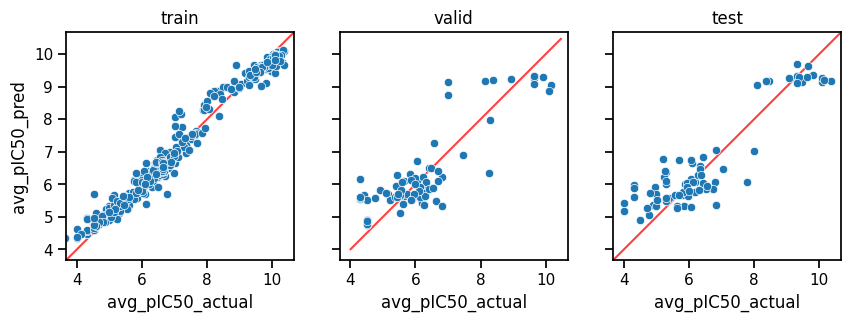

In [9]:
import atomsci.ddm.pipeline.perf_plots as pp

model_path=result_df.iloc[0].model_path

pp.plot_pred_vs_actual_from_file(model_path)